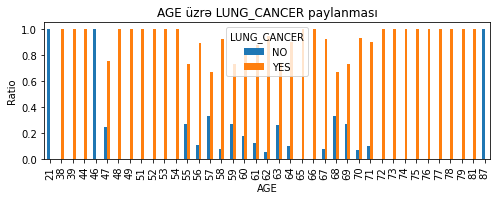

In [16]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Data connection function
def load_data():
    file_path = filedialog.askopenfilename()
    try:
        global df
        df = pd.read_csv(file_path)
        messagebox.showinfo("Success", "Dataset loaded successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"Dataset failed to load: {str(e)}")

# Data preprocessing function
def clean_data():
    try:
        global df
        df.dropna(inplace=True)
        df.drop_duplicates() 
        messagebox.showinfo("Success", "Data cleared.")
    except Exception as e:
        messagebox.showerror("Error", f"Data was not cleared: {str(e)}")

# Function to update combobox
def update_combobox():
    columns = list(df.columns)
    combobox['values'] = columns            
        
# Interactive visualization function
def plot_data():
    try:
        selected_column = combobox.get()
        fig, ax = plt.subplots()
        df.groupby(selected_column)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax, figsize=(8, 5))
        ax.set_title(f"{selected_column} üzrə LUNG_CANCER paylanması")
        ax.set_xlabel(selected_column)
        ax.set_ylabel("Ratio")

        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=20)
    except Exception as e:
        messagebox.showerror("Error", f"Chart not created: {str(e)}")
        

# Create the main window
root = tk.Tk()
root.title("Lung Cancer Prediction Dataset")
root.geometry("600x400")

# Button for data connection
btn_load = tk.Button(root, text="Download dataset", command=load_data)
btn_load.pack(pady=10)

# Button for data preprocessing
btn_clean = tk.Button(root, text="Clear Data", command=clean_data)
btn_clean.pack(pady=10)

# Combobox to select the column
combobox = ttk.Combobox(root)
combobox.pack(pady=10)

# Button for data visualization
btn_plot = tk.Button(root, text="Graph it", command=plot_data)
btn_plot.pack(pady=10)

root.mainloop()
